### Imports

In [1]:
import torch, torchvision
from torchvision.transforms.functional import to_tensor
from PIL import Image
import requests
from io import BytesIO

### Load pretrained Fasster R-CNN

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()
if torch.cuda.is_available():
    model.cuda()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\pc/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100.0%


### Load Image

In [3]:
img = Image.open("assets/car2.jpg")

# To tensor and move to GPU if available
x = to_tensor(img).unsqueeze(0)
if torch.cuda.is_available():
    x = x.cuda()

### Interference

In [4]:
with torch.no_grad():
    out = model(x)[0]

### Inspect

In [6]:
try:
    from torchvision.datasets.coco import CocoDetection
    CLASSES = CocoDetection.coco.CLASSES
except (ImportError, AttributeError):
    try:
        # Alternative method for newer versions
        from torchvision.datasets import CocoDetection
        CLASSES = CocoDetection.coco.CLASSES
    except (ImportError, AttributeError):
        # Fallback: define COCO classes manually
        CLASSES = [
            'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
            'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
            'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
            'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
            'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
            'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
            'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
            'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
            'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
            'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
        ]

for i in range(min(5, len(out["scores"]))):
    score = float(out["scores"][i].item())
    if score < 0.5: 
        continue
    label_id = int(out["labels"][i].item())
    label = str(label_id) if not CLASSES else CLASSES[label_id]
    box = out["boxes"][i].tolist()
    print(f"{label}  score={score:.2f}  box={box}")

motorcycle  score=1.00  box=[32.94608688354492, 292.685546875, 202.84796142578125, 377.7725830078125]
bicycle  score=1.00  box=[587.0697021484375, 230.4466552734375, 612.8208618164062, 274.25628662109375]
motorcycle  score=1.00  box=[197.74404907226562, 219.72108459472656, 333.375244140625, 291.5744323730469]
motorcycle  score=0.88  box=[244.377197265625, 303.1800231933594, 381.3455505371094, 377.106689453125]
cup  score=0.85  box=[598.83984375, 274.3253173828125, 618.0093994140625, 287.3653259277344]


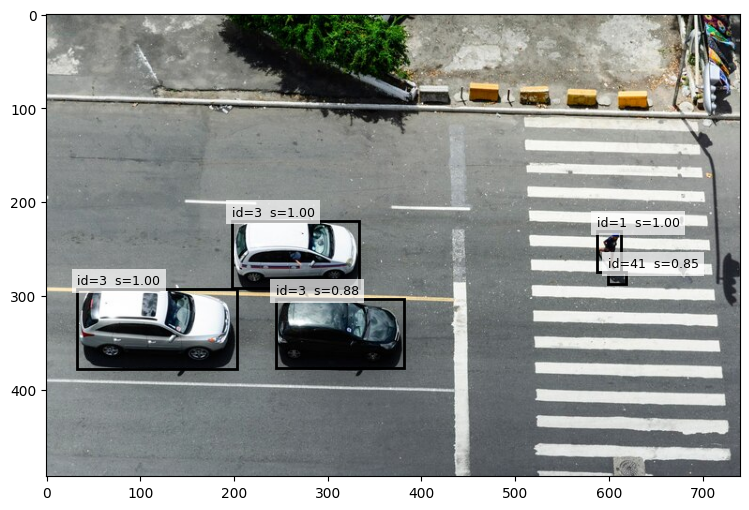

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(img)
scores = out["scores"].detach().float().cpu()
boxes  = out["boxes"].detach().float().cpu()
labels = out["labels"].detach().int().cpu()

for box, score, label in zip(boxes, scores, labels):
    if score < 0.6:   # raise/lower to see effect on precision/recall
        continue
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, fill=False)
    ax.add_patch(rect)
    ax.text(x1, y1-5, f"id={label.item()}  s={score:.2f}",
            fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.show()